# Shape Aggregation Exploration

Exploring the effect of using different aggregation methods on resulting shape.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
from descartes import PolygonPatch
import get_average_shape as gas
import average_shape_helpers as ash

In [42]:
def wiggle_ellipse(e, variances=(0.05, 0.2, 0.01)):
    out = {**e}
    out['mu'] = out['mu'] + np.random.randn(2) * variances[0]
    out['roll'] += np.random.randn() * variances[1]
    out['rEff'] = np.clip(out['rEff'] + np.random.randn() * variances[2], 0.01, 1E10)
    out['axRatio'] = np.clip(out['axRatio'] + np.random.randn() * variances[2], 0.01, 1)
    return out

In [43]:
def m2(es):
    return np.mean([e['rEff'] * e['axRatio'] for e in es]) / np.mean([e['rEff'] for e in es])

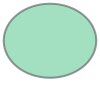

In [44]:
e = {
    'roll': 0,
    'rEff': 40,
    'axRatio': 0.8,
    'mu': np.array([0, 0]), 
}
ash.make_ellipse(e)

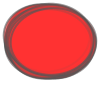

In [41]:
cluster = [wiggle_ellipse(e) for i in range(50)]
cluster_geoms = list(map(ash.make_ellipse, cluster))
MultiPolygon(cluster_geoms)

CPU times: user 3.34 ms, sys: 732 µs, total: 4.07 ms
Wall time: 3.63 ms


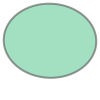

In [45]:
%time mean_result = gas.aggregate_comp_mean(cluster)
ash.make_ellipse(mean_result)

CPU times: user 24.2 s, sys: 79 ms, total: 24.3 s
Wall time: 24.6 s


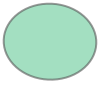

In [46]:
%time jaccard_result = gas.aggregate_geom_jaccard(cluster_geoms, x0=(0, 0, 50, 1, 0))
ash.make_ellipse(jaccard_result)

In [47]:
print('Mean obtained through <rx> / <ry>: {:.8f}'.format(m2(cluster)))

Mean obtained through <rx> / <ry>: 0.80000000


In [48]:
pd.DataFrame([e, mean_result, jaccard_result], index=('Target', 'Parameter Mean', 'Jaccard mean'))

,axRatio,c,i0,mu,n,rEff,roll
Target,0.80000,NaN,NaN,"[0, 0]",NaN,40.000000,0.000000
Parameter Mean,0.80000,2.0,1.0,"[0.007771228325412974, 0.006811554374788777]",1.0,1.000000,0.039200
Jaccard mean,0.81962,NaN,NaN,"[0.004855088592430119, 0.005286018274285156]",NaN,-0.993341,0.045287


In [49]:
def create_patch(c, color='C0'):
    return PolygonPatch(
        c, fc=color, ec='k',
        alpha=0.2
    )

(-50, 50)

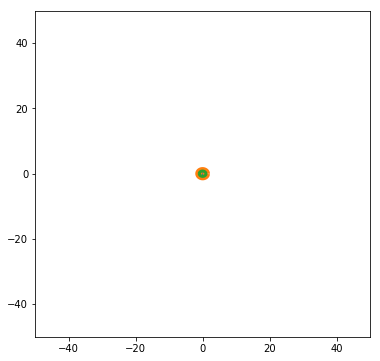

In [50]:
plt.figure(figsize=(6, 6))
for c in cluster_geoms:
    plt.gca().add_patch(
        PolygonPatch(
            c, fc='C0', ec='k',
            alpha=0.1
        )
    )
plt.gca().add_patch(
    PolygonPatch(
        ash.make_ellipse(mean_result), fc='none', ec='C1', linewidth=8,
        alpha=1
    )
)
plt.gca().add_patch(
    PolygonPatch(
        ash.make_ellipse(jaccard_result), fc='none', ec='C2', linewidth=3,
        alpha=1
    )
)


plt.xlim(-50, 50)
plt.ylim(-50, 50)